In [ ]:
# Install a pip comtradeapicall package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install --upgrade comtradeapicall

In [ ]:
# Install a pip pandas package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install pandas

In [ ]:
# Install a pip matplotlib package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install matplotlib

In [ ]:
# Install a pip scipy package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install scipy

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import comtradeapicall

In [6]:
subscription_key = '<YOUR KEY>' # comtrade api subscription key (from comtradedeveloper.un.org)
directory = '<OUTPUT DIR>'  # output directory for downloaded files

In [7]:
# Call get tariffline data API to a data frame, max to 250K records, free/premium subscription key required
# This example: imports of the assigned commodity_code (below) so that we can calculate the global unit value ($/kg)

In [8]:
Commodity_code = '3006' #pharmaceutical goods
Commodity_code = '1006' #rice
Commodity_code = '7108' #non-monetary gold
Commodity_code = '9201' #piano
Commodity_code = '2709' #crude oil
Commodity_code = '0901' #coffee
Commodity_code = '6309' #secondhand/ worn clothing
Commodity_code = '1001' #wheat and meslin

In [9]:
# create an Empty DataFrame object
panDForig = pd.DataFrame()
# A list of periods (this is for monthly sets), this is to optimize the API calls and avoid timeout
period_start = '2019-01-01'
period_end = '2022-12-01'
periods = pd.date_range(period_start,period_end,
              freq='MS').strftime("%Y%m").tolist()

In [10]:
# convert periods list into string with comma delimiter
delim = ","
temp = list(map(str, periods))
period_string = delim.join(temp)
print(period_string)

201901,201902,201903,201904,201905,201906,201907,201908,201909,201910,201911,201912,202001,202002,202003,202004,202005,202006,202007,202008,202009,202010,202011,202012,202101,202102,202103,202104,202105,202106,202107,202108,202109,202110,202111,202112,202201,202202,202203,202204,202205,202206,202207,202208,202209,202210,202211,202212


In [11]:
# get all tariffline data for a specific commodity_code
# this is a long operation and it is better to use comtradeapicall._getTarifflineData instead of comtradeapicall.getTarifflineData
# the function will split the query into multiple API calls reducing risk of timeout and increasing response time
panDForig = comtradeapicall._getTarifflineData(subscription_key, typeCode='C', freqCode='M', clCode='HS',
                                             period=period_string,
                                             reporterCode=None, cmdCode=Commodity_code, flowCode='M',
                                             partnerCode=None, partner2Code=None, customsCode=None, motCode=None, maxRecords=None,
                                             format_output='JSON',
                                             countOnly=None, includeDesc=True)

In [12]:
#check number of records
print('Final row count is:', len(panDForig))

Final row count is: 47408


In [13]:
#convert period to string for better viz
panDForig['period'] = panDForig['period'].astype('string')
panDForig['motCode'] = panDForig['motCode'].astype('string')
print(panDForig.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47408 entries, 0 to 38
Data columns (total 34 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   typeCode            47408 non-null  object 
 1   freqCode            47408 non-null  object 
 2   refPeriodId         47408 non-null  int64  
 3   period              47408 non-null  string 
 4   reporterCode        47408 non-null  int64  
 5   reporterDesc        47408 non-null  object 
 6   reporterISO         47408 non-null  object 
 7   flowCode            47408 non-null  object 
 8   flowDesc            47408 non-null  object 
 9   partnerCode         47408 non-null  int64  
 10  partnerDesc         47408 non-null  object 
 11  partnerISO          47408 non-null  object 
 12  partner2Code        47408 non-null  int64  
 13  partner2Desc        47408 non-null  object 
 14  partner2ISO         47408 non-null  object 
 15  classificationCode  47408 non-null  object 
 16  cmdCode

In [14]:
 #show some records
panDForig.head()

,typeCode,freqCode,refPeriodId,period,reporterCode,reporterDesc,reporterISO,flowCode,flowDesc,partnerCode,...,qtyUnitAbbr,qty,altQtyUnitCode,altQtyUnitAbbr,altQty,netWgt,grossWgt,cifvalue,fobvalue,primaryValue
0,C,M,20190101,201901,24,Angola,AGO,M,Import,250,...,N/A,0.0,-1,N/A,0.0,2598000.0,0.0,9.206265e+05,0.0,9.206265e+05
1,C,M,20190101,201901,24,Angola,AGO,M,Import,250,...,N/A,0.0,-1,N/A,0.0,2875350.0,0.0,1.014229e+06,0.0,1.014229e+06
2,C,M,20190101,201901,24,Angola,AGO,M,Import,250,...,N/A,0.0,-1,N/A,0.0,4846000.0,0.0,1.756661e+06,0.0,1.756661e+06
3,C,M,20190101,201901,24,Angola,AGO,M,Import,250,...,N/A,0.0,-1,N/A,0.0,8000000.0,0.0,2.834797e+06,0.0,2.834797e+06
4,C,M,20190101,201901,24,Angola,AGO,M,Import,250,...,N/A,0.0,-1,N/A,0.0,8000000.0,0.0,2.834797e+06,0.0,2.834797e+06


In [15]:
#some descriptive stats
panDForig[['primaryValue','netWgt']].describe()

,primaryValue,netWgt
count,4.740800e+04,4.740800e+04
mean,2.564616e+06,6.851207e+06
std,1.017324e+07,3.475896e+07
min,0.000000e+00,0.000000e+00
25%,4.950652e+02,1.750000e+02
50%,3.087227e+04,4.145200e+04
75%,8.158637e+05,1.983725e+06
max,3.697648e+08,4.140400e+09


In [16]:
#add new column UVnetWgt = primaryValue/netWgt
panDForig['UVnetWgt'] = panDForig.primaryValue / panDForig.netWgt

In [17]:
#remove UVnetWgt NaN,zero, inf, but and keeping only mode of transport and period
panDF = panDForig[["motDesc","period","UVnetWgt"]]
panDF = panDF[panDF.notnull()].query('UVnetWgt>0')
panDF = panDF[panDF.notnull()].query('UVnetWgt<999999999999999')
panDF.describe()

,UVnetWgt
count,42151.000000
mean,46.986202
std,2811.050702
min,0.000039
25%,0.249126
50%,0.333644
75%,0.716554
max,389718.250000


Text(0.5, 1.0, 'Unit Value Distribution')

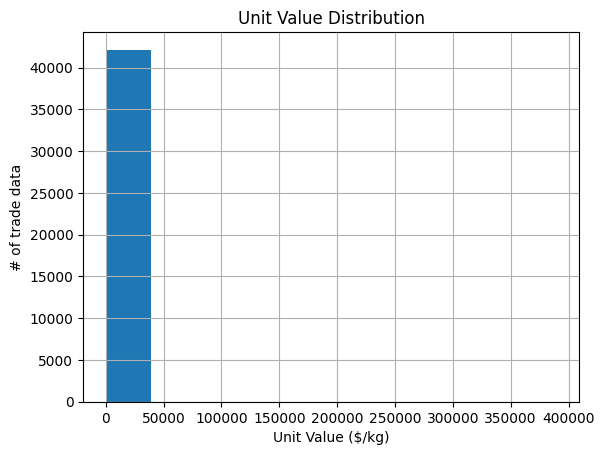

In [18]:
 # plot the Unit Value histogram
panDF.hist("UVnetWgt");
plt.xlabel('Unit Value ($/kg)')
plt.ylabel('# of trade data')
plt.title('Unit Value Distribution')

Text(0.5, 1.0, 'Unit Value Distribution')

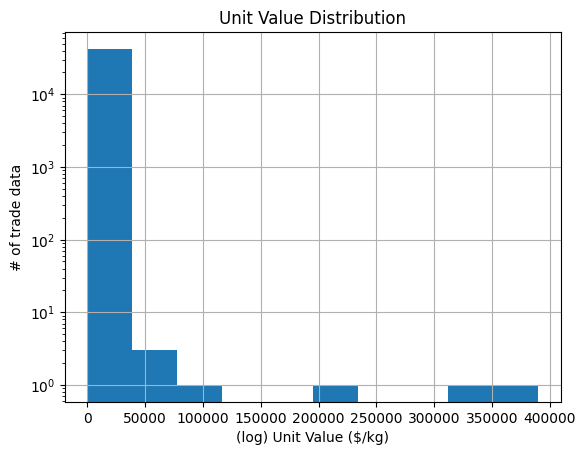

In [19]:
# plot the Unit Value histogram - in log scale (more suited for trade data with long distribution tail)
panDF.hist("UVnetWgt", log=True);
plt.xlabel('(log) Unit Value ($/kg)')
plt.ylabel('# of trade data')
plt.title('Unit Value Distribution')

In [20]:
#add log UVnetWgtLog
panDF.loc[:,'UVnetWgtLog'] = np.log(panDF['UVnetWgt'])
panDF.describe()

,UVnetWgt,UVnetWgtLog
count,42151.000000,42151.000000
mean,46.986202,-0.635881
std,2811.050702,1.329093
min,0.000039,-10.152513
25%,0.249126,-1.389795
50%,0.333644,-1.097681
75%,0.716554,-0.333302
max,389718.250000,12.873179


In [21]:
#remove outliers based on zcores (if more than 3 standard deviation) on the log Unit Value
from scipy.stats import zscore
#calculate z-scores of `df`
z_scores = zscore(panDF['UVnetWgtLog'], axis=0)
#print(z_scores)
abs_z_scores = np.abs(z_scores)
#print(abs_z_scores)
filtered_entries = (abs_z_scores < 3)
#print(filtered_entries)
new_panDF = panDF[filtered_entries]

In [22]:
 #descriptive statistics after outliers removal
new_panDF.describe()

,UVnetWgt,UVnetWgtLog
count,41028.000000,41028.000000
mean,0.895525,-0.788579
std,2.110206,0.914200
min,0.010523,-4.554184
25%,0.247639,-1.395784
50%,0.326201,-1.120241
75%,0.646970,-0.435455
max,28.500000,3.349904


array([[<AxesSubplot:title={'center':'UVnetWgt'}>,
        <AxesSubplot:title={'center':'UVnetWgtLog'}>]], dtype=object)

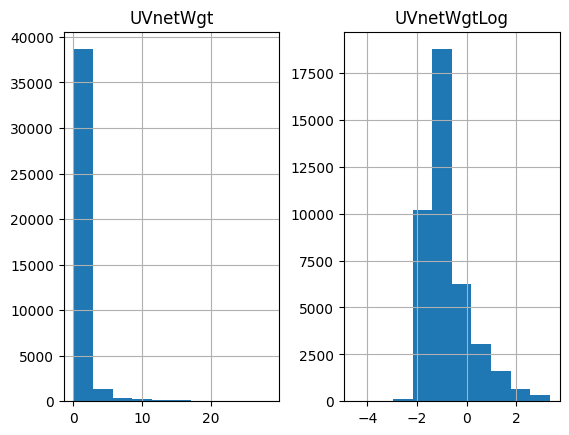

In [23]:
#histogram statistics after outliers removal
new_panDF.hist(column=['UVnetWgt','UVnetWgtLog'])

<AxesSubplot:xlabel='period'>

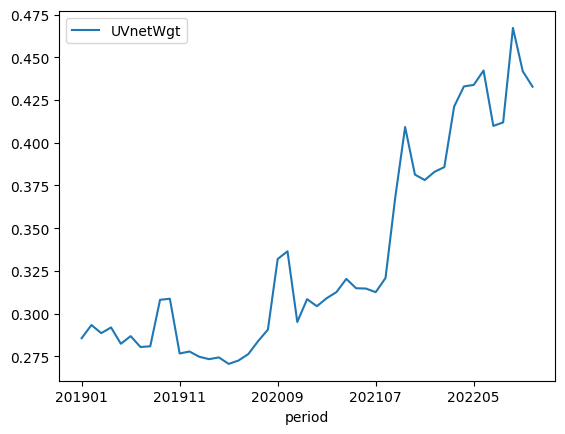

In [24]:
#plot median in timeseries after outliers removal
new_panDF[['period','UVnetWgt']].groupby("period").median().plot()

<AxesSubplot:xlabel='motDesc'>

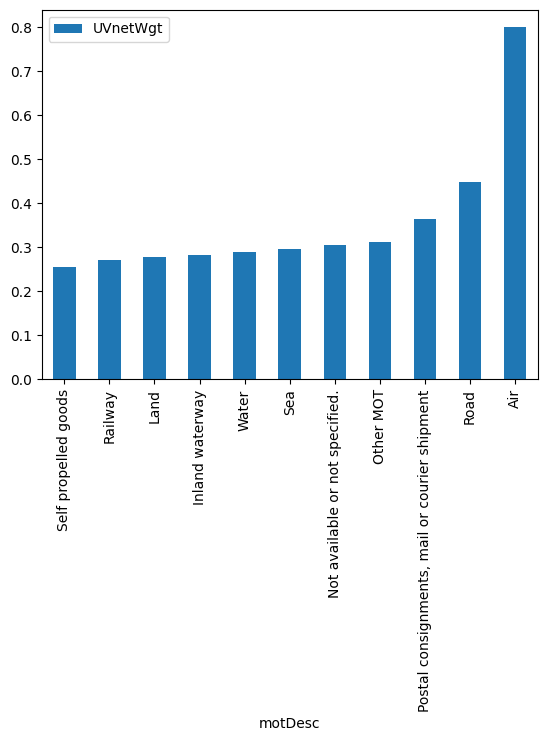

In [25]:
#plot median by mode of transport after outliers removal
new_panDF[['motDesc','UVnetWgt']].groupby("motDesc").median().sort_values(by='UVnetWgt').plot.bar(y='UVnetWgt', rot=90)

In [26]:
#some extra analysis  - descriptive statstiscs by period
new_panDF[['period','UVnetWgt']].groupby("period").describe()

UVnetWgt                                                              \
          count      mean       std       min       25%       50%       75%   
period                                                                        
201901    899.0  0.687834  1.529282  0.068285  0.238304  0.285607  0.458334   
201902    918.0  0.837510  2.255574  0.060220  0.243405  0.293315  0.556737   
201903    975.0  0.806210  1.832657  0.063355  0.239093  0.288572  0.565092   
201904    927.0  0.803855  1.810199  0.051082  0.237987  0.291908  0.531320   
201905    899.0  0.813792  2.260652  0.100000  0.232939  0.282369  0.446670   
201906    797.0  0.778679  1.869781  0.037645  0.233264  0.286817  0.473750   
201907    855.0  0.833644  2.076380  0.012491  0.222092  0.280460  0.478282   
201908    920.0  0.731025  1.570318  0.026720  0.216354  0.280875  0.488467   
201909   1081.0  0.878968  2.353355  0.016752  0.223980  0.308075  0.641369   
201910   1087.0  0.862811  1.965035  0.024388  0.222611  0.308700  0.668547   
201911    930.0  0.689182  1.466217  0.028042  0.216137  0.276671  0.520184   
201912    869.0  0.706224  1.656491  0.058884  0.216745  0.277836  0.477381   
202001    866.0  0.667005  1.458126  0.054795  0.222963  0.274755  0.444014   
202002    862.0  0.781535  1.945646  0.011240  0.222237  0.273355  0.484306   
202003    895.0  0.871325  2.241334  0.016472  0.228302  0.274375  0.565969   
202004    847.0  0.646196  1.358990  0.085755  0.224266  0.270565  0.459159   
202005    808.0  0.794322  2.151422  0.010523  0.228859  0.272546  0.425237   
202006    743.0  0.855688  2.230505  0.012791  0.233040  0.276307  0.448959   
202007    791.0  0.875481  1.986716  0.058042  0.233967  0.283885  0.492555   
202008    852.0  0.809450  1.958836  0.016250  0.233297  0.290626  0.579165   
202009   1074.0  0.785406  1.653604  0.021226  0.237691  0.331958  0.694139   
202010   1059.0  0.954332  2.379257  0.019620  0.241987  0.336434  0.712909   
202011    928.0  0.845165  1.685671  0.027615  0.244570  0.295103  0.682741   
202012    883.0  0.899272  2.146791  0.098257  0.253448  0.308442  0.612527   
202101    863.0  0.948498  2.275260  0.060967  0.254032  0.304335  0.633247   
202102    888.0  0.886986  1.954008  0.099541  0.257812  0.309028  0.676923   
202103    977.0  0.961989  2.141215  0.034521  0.264037  0.312612  0.813392   
202104    869.0  0.905802  1.768420  0.048828  0.269999  0.320324  0.755006   
202105    774.0  0.985204  2.379855  0.049832  0.274469  0.314843  0.616996   
202106    813.0  0.977215  2.252467  0.061034  0.276090  0.314667  0.595342   
202107    834.0  1.002913  2.528448  0.017690  0.265937  0.312538  0.591091   
202108    938.0  0.948733  2.235080  0.022876  0.259032  0.320840  0.626015   
202109   1132.0  0.918812  1.663904  0.025875  0.282423  0.368281  0.785957   
202110   1172.0  1.065890  2.355434  0.017391  0.291263  0.409196  0.904108   
202111    987.0  1.065014  2.308734  0.042778  0.294993  0.381329  0.840333   
202112    918.0  1.023464  2.155146  0.022624  0.290453  0.378161  0.706110   
202201    890.0  1.014129  2.412783  0.012911  0.298595  0.382969  0.748142   
202202    981.0  0.989596  2.199664  0.070835  0.307000  0.385728  0.805850   
202203   1034.0  1.087844  2.798794  0.110190  0.324778  0.421139  0.770213   
202204    844.0  0.955982  2.147626  0.086891  0.323450  0.432939  0.784861   
202205    790.0  1.230115  2.928823  0.042918  0.322849  0.433811  0.812626   
202206    730.0  1.117601  2.591716  0.109575  0.318935  0.442237  0.838175   
202207    611.0  1.002636  2.340211  0.022874  0.275269  0.409834  0.764988   
202208    753.0  0.981143  2.282392  0.023603  0.290940  0.411883  0.843678   
202209    823.0  1.035417  2.395224  0.011095  0.302731  0.467159  0.977510   
202210    609.0  0.915062  1.914942  0.098148  0.280002  0.441817  0.857921   
202211     33.0  0.669475  1.437416  0.201629  0.369000  0.432772  0.475313   

                   
              max  
period          

In [27]:
#some extra analysis - descriptive statstiscs by motOfTransport (air, water,land)
new_panDF[['motDesc','UVnetWgt']].groupby("motDesc").describe()

UVnetWgt                      \
                                                 count      mean       std   
motDesc                                                                      
Air                                             1224.0  2.290144  4.542673   
Inland waterway                                  499.0  0.311105  0.117126   
Land                                             427.0  0.544894  0.599091   
Not available or not specified.                19363.0  0.941322  2.386520   
Other MOT                                       3274.0  0.671628  1.176996   
Postal consignments, mail or courier shipment    104.0  1.941082  3.972410   
Railway                                         1044.0  0.311970  0.170350   
Road                                            9624.0  0.973658  1.734752   
Sea                                             4801.0  0.621080  1.278218   
Self propelled goods                               1.0  0.254573       NaN   
Water                                            667.0  0.366856  0.462973   

                                                                             \
                                                    min       25%       50%   
motDesc                                                                       
Air                                            0.019620  0.423140  0.799616   
Inland waterway                                0.060967  0.225992  0.283340   
Land                                           0.012491  0.219016  0.278046   
Not available or not specified.                0.011095  0.244118  0.305956   
Other MOT                                      0.022624  0.223667  0.311836   
Postal consignments, mail or courier shipment  0.106296  0.234772  0.365206   
Railway                                        0.080759  0.219519  0.270294   
Road                                           0.011240  0.279015  0.448655   
Sea                                            0.010523  0.249047  0.296557   
Self propelled goods                           0.254573  0.254573  0.254573   
Water                                          0.209904  0.256428  0.289338   

                                                                    
                                                    75%        max  
motDesc                                                             
Air                                            1.445321  28.333333  
Inland waterway                                0.357537   1.172212  
Land                                           0.713205   6.726667  
Not available or not specified.                0.559245  28.500000  
Other MOT                                      0.667200  21.918480  
Postal consignments, mail or courier shipment  1.462396  22.773864  
Railway                                        0.345335   2.438281  
Road                                           0.949953  28.246370  
Sea                                            0.436954  25.517069  
Self propelled goods                           0.254573   0.254573  
Water                                          0.327905   7.143184